<a href="https://colab.research.google.com/github/Smartprem/OpenCV_to_Cartoonize/blob/main/OpenCV_to_Cartoonize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Loading Image

In [9]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show
    return img

In [5]:
from google.colab import files
uploaded = files.upload()

Saving IMG-1201.jpg to IMG-1201.jpg


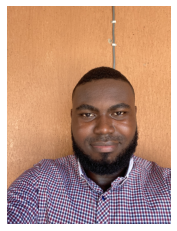

In [10]:
filename = "IMG-1201.jpg"
img = read_file(filename)

#Create Edge Mask

In [12]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges

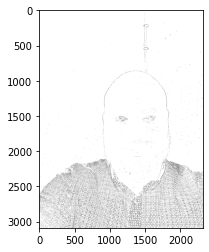

In [27]:
line_size, blur_value = 5, 7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap = "gray" )

#Reducing Color Palette

In [34]:
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((1,3))

    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    #implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS )
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result